<a href="https://colab.research.google.com/github/Stranger-67/ML-sample-model-projects/blob/main/Stock_Price_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/AAPL.csv')
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [2]:
df1=df.reset_index()['close']


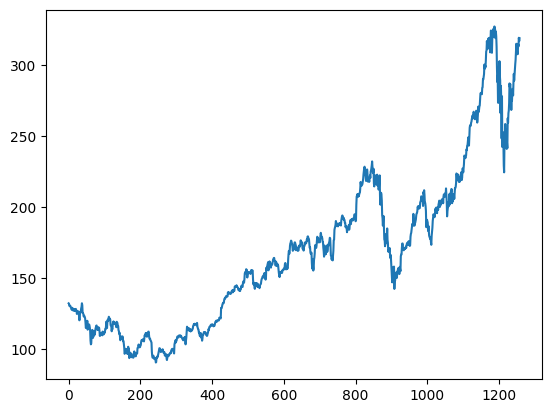

In [3]:
import matplotlib.pyplot as plt
plt.plot(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


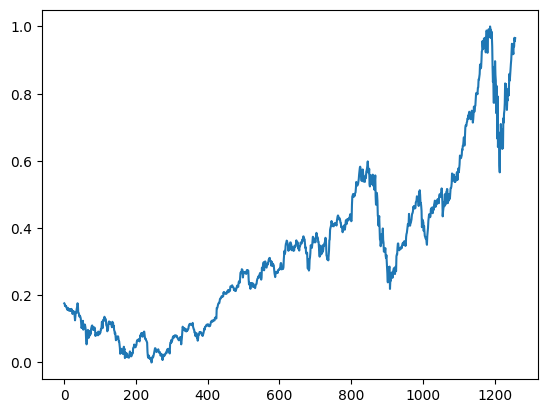

In [4]:
## minmaxscaler() used as LSTM sensitive to scale of data
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)
plt.plot(df1)

In [5]:
##splitting dataset into train and test split. Time series data can't be split randomly
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [6]:
training_size,test_size


(817, 441)

In [8]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)
 # reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [13]:
# reshape input to be [samples, time steps, features] which is required for LSTM i.e. convert to 3-D
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

[[0.52651355]
 [0.52837119]
 [0.53119986]
 [0.53871485]
 [0.5461454 ]
 [0.55999324]
 [0.56864815]
 [0.57962509]
 [0.58270708]
 [0.57641645]
 [0.56049987]
 [0.55290045]
 [0.54036139]
 [0.5636663 ]
 [0.55192941]
 [0.57447437]
 [0.56362408]
 [0.53846154]
 [0.53998142]
 [0.54053027]
 [0.54753863]
 [0.53753272]
 [0.55074728]
 [0.55665794]
 [0.54918517]
 [0.56831039]
 [0.5716457 ]
 [0.57806299]
 [0.58659124]
 [0.59837035]
 [0.58114498]
 [0.56552394]
 [0.56332855]
 [0.57641645]
 [0.53204425]
 [0.52398041]
 [0.55632019]
 [0.53626615]
 [0.55648907]
 [0.55243604]
 [0.5306088 ]
 [0.54449886]
 [0.55015621]
 [0.55893777]
 [0.52668243]
 [0.54656759]
 [0.53179093]
 [0.51465   ]
 [0.51912522]
 [0.542599  ]
 [0.5567846 ]
 [0.49455374]
 [0.46968673]
 [0.47889048]
 [0.50498185]
 [0.49881787]
 [0.48184582]
 [0.43836021]
 [0.43016972]
 [0.40724479]
 [0.42670776]
 [0.43565819]
 [0.4032762 ]
 [0.3657857 ]
 [0.36494132]
 [0.34598497]
 [0.355822  ]
 [0.35421768]
 [0.38250443]
 [0.37663599]
 [0.37254074]
 [0.39

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - loss: 0.0269 - val_loss: 0.0705
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 234ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - loss: 0.0014 - val_loss: 0.0042
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - loss: 8.8692e-04 - val_loss: 0.0049
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - loss: 6.5391e-04 - val_loss: 0.0064
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 264ms/step - loss: 6.6473e-04 - val_loss: 0.0045
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - loss: 6.2722e-04 - val_loss: 0.0043
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 6.0750e-04 - val_loss: 0.0045
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - loss: 6.0516e-04 - val_loss: 0.0043
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 6.1916e-04 - val_loss: 0.0044
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - loss: 6.3435e-04 - val_loss: 0.0036
Epoch 12/

In [15]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)



23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [16]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.38906054110515

In [17]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

235.04294909543952

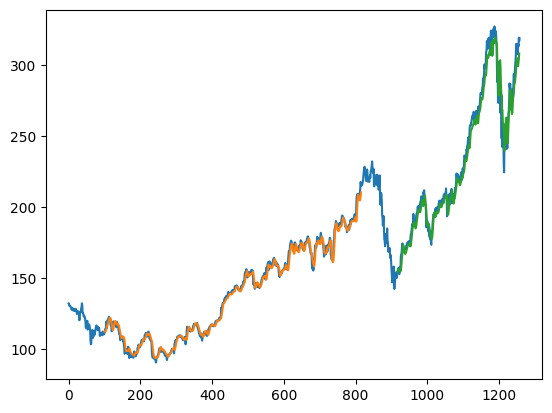

In [19]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [20]:
x_input=test_data[341:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [21]:
# demonstrate prediction for next 30 days

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1




[0.9310552]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

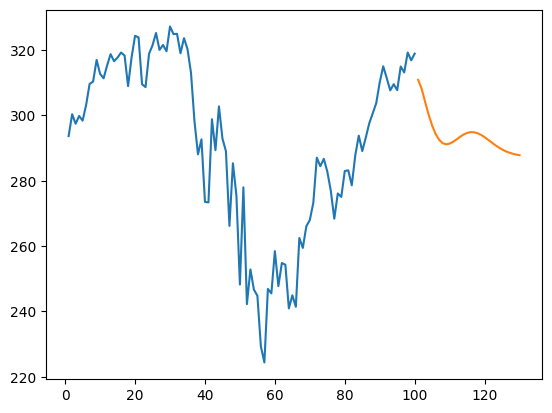

In [23]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


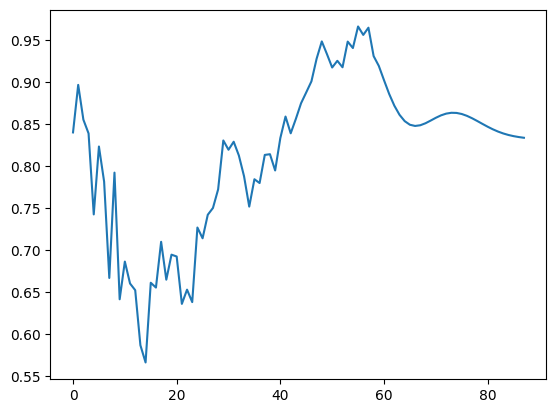

In [24]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


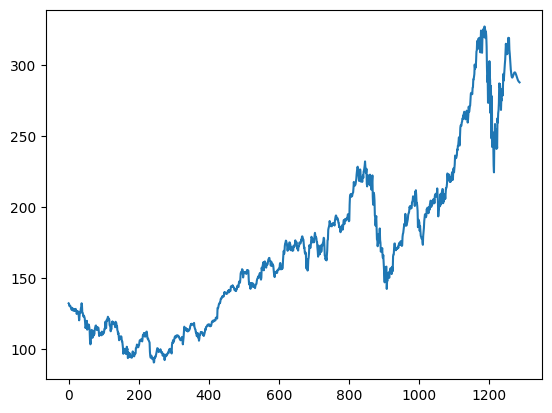

In [25]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)